In [ ]:
# importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8
pd.set_option('display.max_columns', None)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
# loading the dataset into pandas dataframe
df = pd.read_csv("Fraud.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [ ]:
df.head(1)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0


In [ ]:
#Becoming one with data

"""
step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).
type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.
amount - amount of the transaction in local currency.
nameOrig - customer who started the transaction
oldbalanceOrg - initial balance before the transaction
newbalanceOrig - new balance after the transaction
nameDest - customer who is the recipient of the transaction
oldbalanceDest - initial balance recipient before the transaction. Note that there is no information for customers that start with M (Merchants).
newbalanceDest - new balance recipient after the transaction. Note that there is no information for customers that start with M (Merchants).
isFraud - This is the transactions made by the fraudulent agents inside the simulation.
    In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers
    accounts and try to empty the funds by transferring to another account and then cashing out of the system.
isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts.
    An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.
"""

'\nstep - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).\ntype - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.\namount - amount of the transaction in local currency.\nnameOrig - customer who started the transaction \noldbalanceOrg - initial balance before the transaction\nnewbalanceOrig - new balance after the transaction\nnameDest - customer who is the recipient of the transaction\noldbalanceDest - initial balance recipient before the transaction. Note that there is no information for customers that start with M (Merchants).\nnewbalanceDest - new balance recipient after the transaction. Note that there is no information for customers that start with M (Merchants).\nisFraud - This is the transactions made by the fraudulent agents inside the simulation. \n    In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers \n    accounts and try to empty the funds by transf

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


#1. Data cleaning including missing values, outliers and multi-collinearity.

In [ ]:
df.isnull().sum()

#Null values are not present

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
#Checking for duplicates

df.duplicated().sum()

0

In [ ]:
df['isFraud'].value_counts()
#data is highly imbalanced, let's plot

0    6354407
1       8213
Name: isFraud, dtype: int64

In [ ]:
df['isFlaggedFraud'].value_counts()
#data is highly imbalanced, let's plot

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

#2. Describe your fraud detection model in elaboration.
Fraud detection models are built to identify and prevent fraudulent activities by analyzing patterns, anomalies, and various data features. Here is a general outline of the key components and steps involved in a fraud detection model:

1. **Data Collection:**
   - Gather relevant data from various sources such as transaction logs, user behavior, account information, and external data feeds.

2. **Data Preprocessing:**
   - Clean and preprocess the data to handle missing values, outliers, and inconsistencies.
   - Feature engineering: Extract relevant features from the data that can help in identifying fraudulent patterns.

3. **Labeling:**
   - Annotate the data with labels indicating whether each instance is a fraudulent or legitimate activity. This labeled dataset is used for training the model.

4. **Model Selection:**
   - Choose an appropriate machine learning algorithm or a combination of algorithms based on the nature of the data and the problem. Common choices include decision trees, random forests, support vector machines, and neural networks.

5. **Training:**
   - Train the model on the labeled dataset, using a portion of the data to learn patterns and relationships between features and the target variable (fraud or non-fraud).

6. **Validation and Tuning:**
   - Evaluate the model's performance on a separate validation set to ensure it generalizes well to new, unseen data.
   - Fine-tune the model parameters to improve its accuracy and robustness.


7. **Ensemble Methods:**
   - Combine multiple models using ensemble methods to enhance overall performance and resilience against different types of fraud. We would be using RandomForest Classfication and Light Gradient Boost Model.  Both are Bagging and Boosting Algortihms under ensemble technique.

8. **Behavior Analysis:**
    - Implement behavioral analysis to detect anomalies in user behavior that may indicate fraudulent activities.

It's important to note that fraud detection is an ongoing process, and models may need to be continuously updated and refined to stay ahead of evolving fraudulent tactics. Additionally, explainability and interpretability are crucial considerations, especially in financial and regulatory contexts.

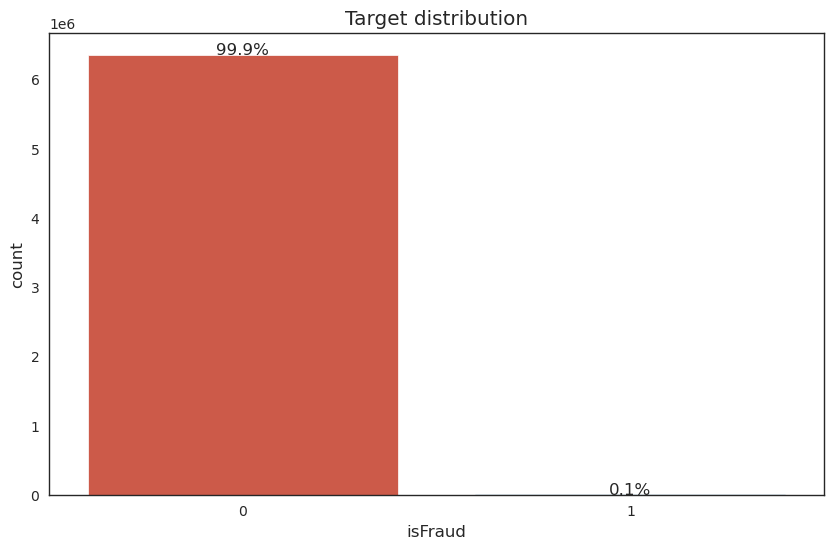

In [ ]:
#EDA

plt.figure(figsize=(10, 6))

# Countplot
sns.countplot(x='isFraud', data=df)
total = len(df['isFraud'])
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 0.1,
             '{:.1%}'.format(height/total),
             ha="center", fontsize=12)

plt.title("Target distribution")
plt.show()

Text(0.5, 1.0, 'Flagged Fraud')

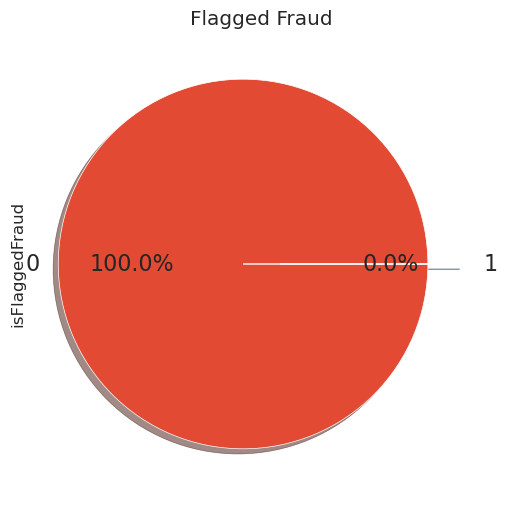

In [ ]:
# Figure size
plt.figure(figsize=(6,6))

# Pie plot
df['isFlaggedFraud'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':16}).set_title("Flagged Fraud")

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Text(0.5, 1.0, 'Type of Transaction')

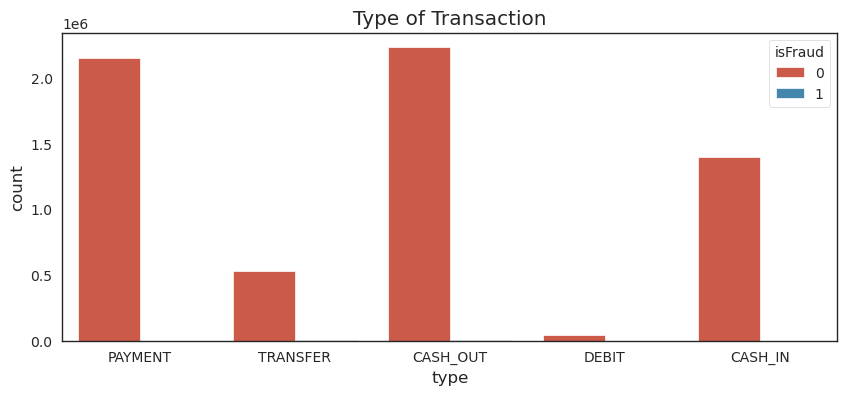

In [ ]:
# Figure size
plt.figure(figsize=(10,4))
sns.countplot(data=df, x="type", hue='isFraud')
plt.title("Type of Transaction")

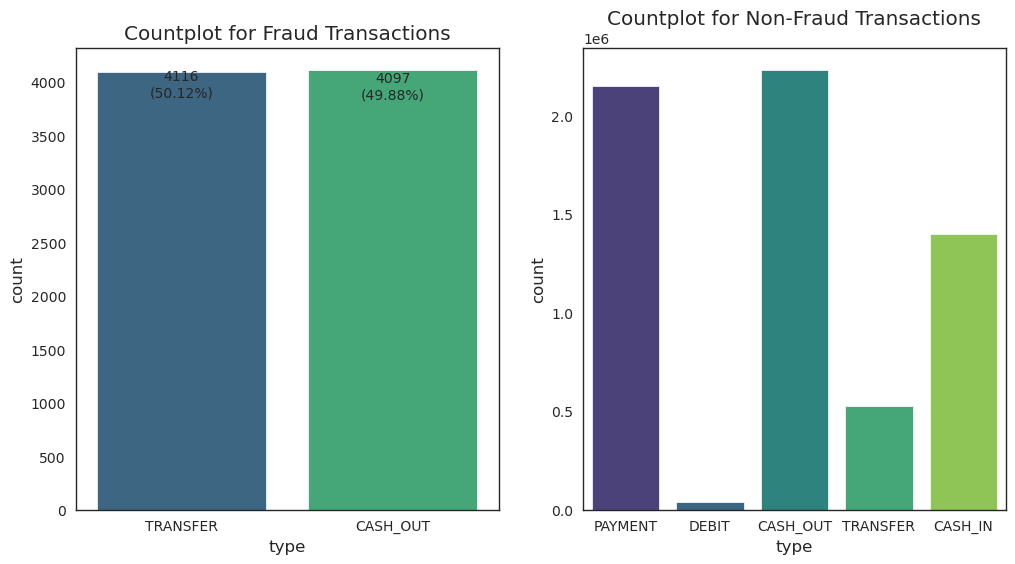

In [ ]:
#Checking payment type feature further
# Plot countplot for fraud transactions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='type', data=df[df['isFraud'] == 1], palette='viridis')
plt.title('Countplot for Fraud Transactions')

# Add count and percentage of fraud values
fraud_count = df[df['isFraud'] == 1]['type'].value_counts()
total_fraud_count = fraud_count.sum()
fraud_percentage = (fraud_count / total_fraud_count) * 100

for i, value in enumerate(fraud_count):
    plt.text(i, value + 1, f'{value}\n({fraud_percentage[i]:.2f}%)', ha='center', va='top')


# Plot countplot for non-fraud transactions
plt.subplot(1, 2, 2)
sns.countplot(x='type', data=df[df['isFraud'] == 0], palette='viridis')
plt.title('Countplot for Non-Fraud Transactions')

# Show the plots
plt.show()


#Transfer and Cash_out are only 2 methods where fraud happens according to the dataset

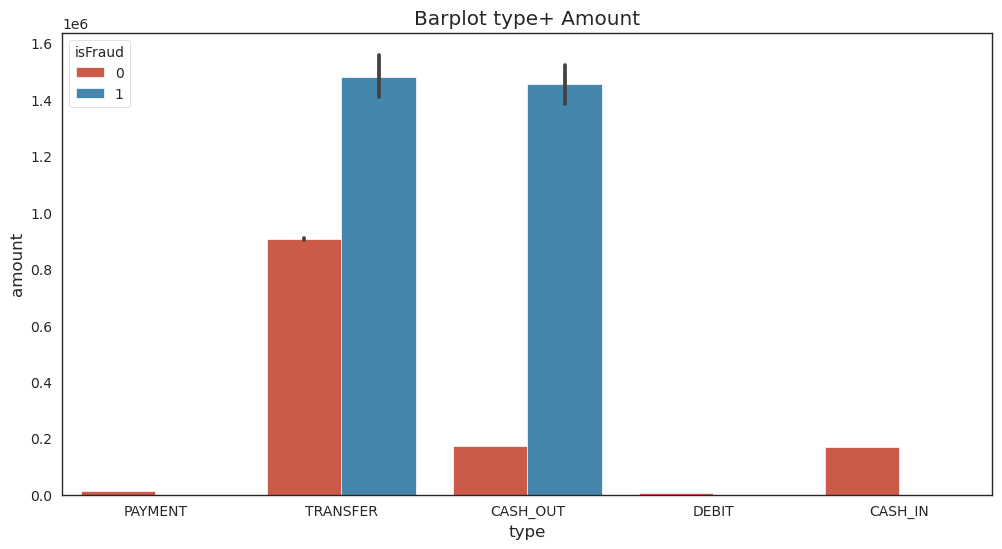

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df['type'],y=df['amount'],hue=df['isFraud'])
plt.title('Barplot type+ Amount')
plt.show()

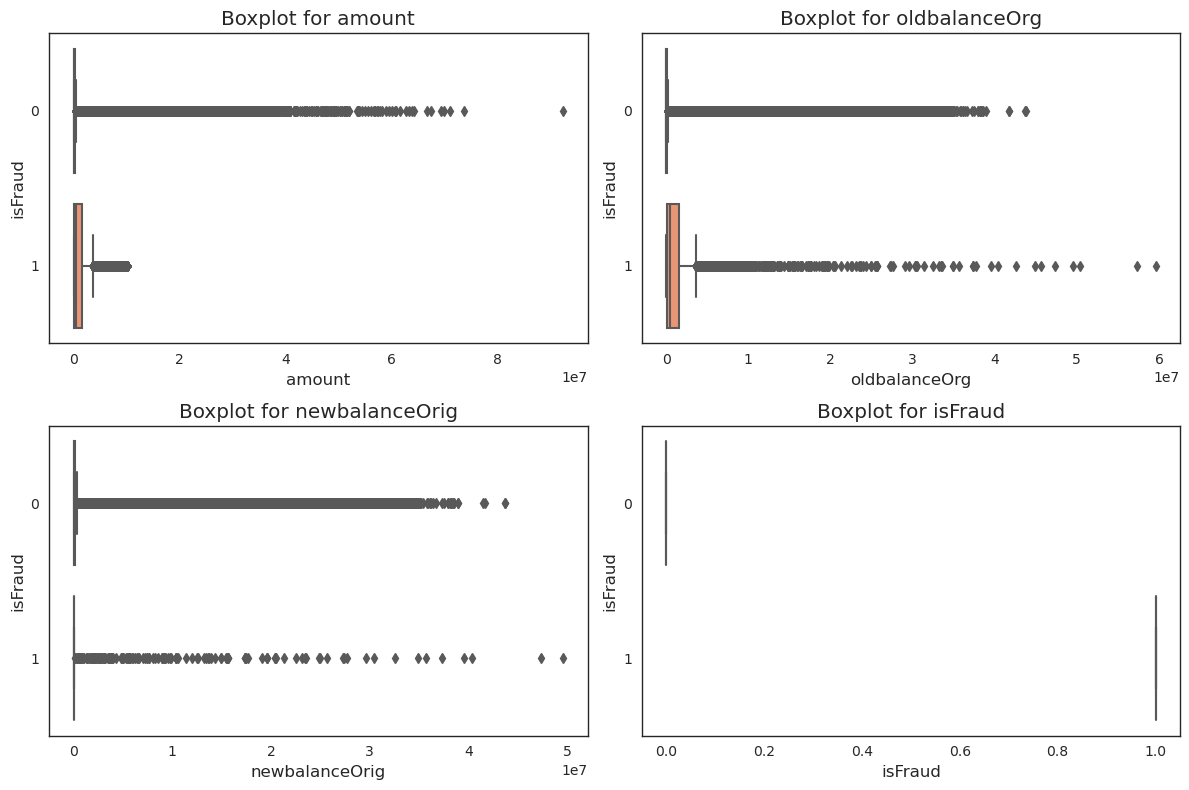

In [ ]:
#numerical_features = ['amount', 'oldbalanceOrg','newbalanceOrig','isFraud']

# Create a horizontal boxplot for each numerical feature
numerical_features =['amount', 'oldbalanceOrg','newbalanceOrig','isFraud']# df.select_dtypes(include=['int', 'float']).columns

plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(2, len(numerical_features)//2, list(numerical_features).index(feature) + 1)
    sns.boxplot(x=feature, y='isFraud', data=df, orient='h', palette='Set2')
    plt.title(f'Boxplot for {feature}')

plt.tight_layout()
plt.show()

In [ ]:
sample_df = df.sample(n=1000)
sns.histplot(data=sample_df, x='amount', binwidth=1, kde=True)
plt.title('Amount Distribution')

In [ ]:
#Checking for fraud transactions

fraud_df = df[df['isFraud'] == 1]
plt.figure(figsize=(10,4))

# Histogram
sns.histplot(data=fraud_df, x='amount', binwidth=1, kde=True)

plt.title('Fraud Money Distribution')

In [ ]:
#Checking for non fraud distribution

non_fraud_df = df[df['isFraud'] == 0].sample(1000)
plt.figure(figsize=(10,4))

# Histogram
sns.histplot(data=non_fraud_df, x='amount', binwidth=1, kde=True)

plt.title('Non Fraud Money Distribution')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


#3. How did you select variables to be included in the model?



In [ ]:
#Handling the categorical value

df.head(2)


#dropping features that are not relevent

drop_features = ['nameOrig','nameDest','isFlaggedFraud']
#We drop the above feautures for the following:
"""
nameOrig is orignal account name, in real world fraud cases don't happen because of name
nameDest is distination account name, again in real world fraud cases don't happen because of name
isFlaggedFraud beacuse just 16 values are isFlaggedFraud==1 out of 6362620 which will add unnecessary burden on the model
"""

dfc = df.drop(drop_features,axis=1)
dfc.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [ ]:
len(df), df.nameOrig.value_counts().sum(), df.nameDest.value_counts().sum(), max(df['oldbalanceDest']) , max(df['newbalanceDest'])

(6362620, 6362620, 6362620, 356015889.35, 356179278.92)

In [ ]:
dfc.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [ ]:
#categorical values to numerical values using OHE
dfc_ohe = pd.get_dummies(dfc,columns=['type'],drop_first=True)
dfc_ohe.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


#4. Demonstrate the performance of the model by using best set of tools.

###As dataset is huge, we will use only 2 algorithms- Random Forest Classification and Light GBM

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# Example: Replace this with your actual dataset and labels
X = dfc_ohe.drop('isFraud',axis=1)
y = dfc_ohe['isFraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Robust Scaling to numerical features to auto handle outliers
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle class imbalance using oversampling (you can choose other methods based on your needs)
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_scaled, y_train)

# Train a classifier (Random Forest as an example)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = clf.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[1270837      67]
 [    265    1355]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.95      0.84      0.89      1620

    accuracy                           1.00   1272524
   macro avg       0.98      0.92      0.95   1272524
weighted avg       1.00      1.00      1.00   1272524



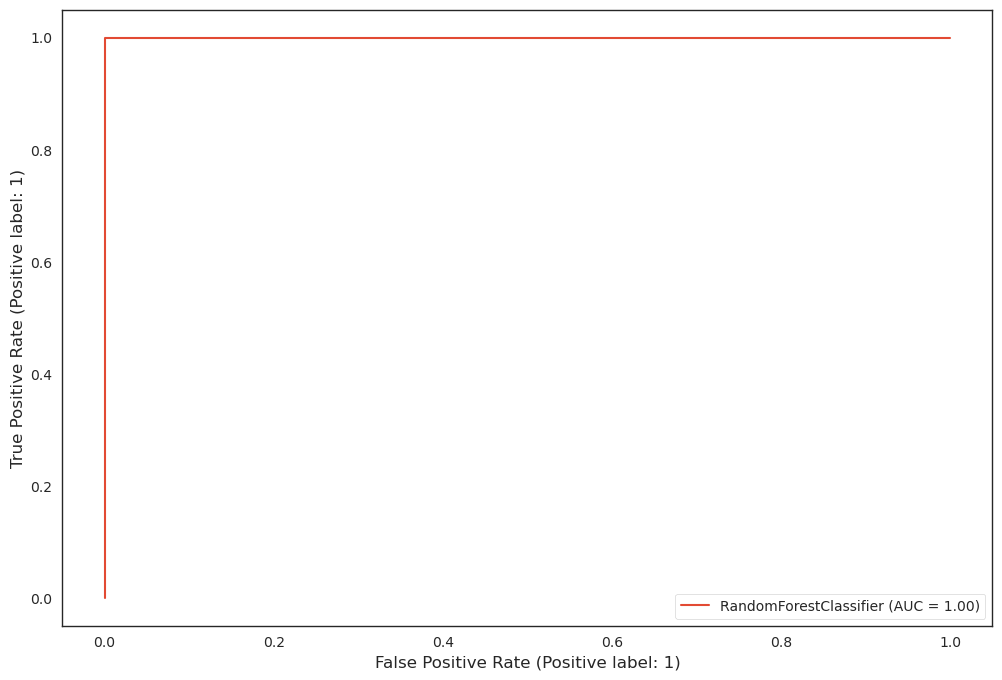

In [ ]:
#Using ROC Curve and AUC Scores
from sklearn.metrics import RocCurveDisplay

"""
ROC-AUC is less affected by imbalanced datasets than some other metrics like accuracy.
This makes it a reliable metric when dealing with datasets where one class is much more prevalent than the other.
"""

RocCurveDisplay.from_estimator(estimator=clf, X=X_train_resampled, y=y_train_resampled)

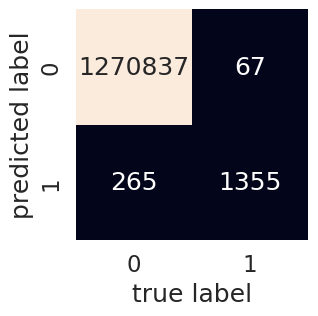

In [ ]:
# Import Seaborn
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     fmt='d',
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")

plot_conf_mat(y_test, y_pred)

In [ ]:
# Cross-validated accuracy score
from sklearn.model_selection import cross_val_score
cv_acc = cross_val_score(clf, X_train_resampled, y_train_resampled,cv=5, # 5-fold cross-validation
                         scoring="f1") # f1 as scoring
cv_acc_rfc = np.mean(cv_acc)
cv_acc_rfc

In [ ]:
#Using RandomizedSearchCV to get the best parameters
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter search space
param_space = {
    'n_estimators': range(10, 201),
    'max_depth': range(1, 21),
    'min_samples_split': range(2, 21),
    'min_samples_leaf': range(1, 21),
}

# Define the Random Forest model
clf_ho = RandomForestClassifier()

# Define RandomizedSearchCV
opt = RandomizedSearchCV(
    clf_ho,
    param_space,
    n_iter=50,  # Number of iterations
    cv=5,       # Number of cross-validation folds
    n_jobs=-1,  # Use all available CPUs
    random_state=42  # Set a random seed for reproducibility
)

# Perform RandomizedSearchCV
opt.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_params = opt.best_params_

# Evaluate the model on the validation set
accuracy = opt.score(X_test_scaled, y_test)
print(f"Best Hyperparameters: {best_params}")
print(f"Validation Accuracy: {accuracy}")

# Now, you can use the best_params_ to create a final RandomForestModel for further evaluation
rfc_final = RandomForestClassifier(**best_params, random_state=42, verbose=0)
rfc_final.fit(X_train_resampled, y_train_resampled)
final_accuracy = rfc_final.score(X_test_scaled, y_test)

# Make predictions on the test set
y_pred_ho = rfc_final.predict(X_test_scaled)

# Evaluate the model
print(f"Random Forest Model Test Accuracy: {final_accuracy}")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ho))
print("\nClassification Report:\n", classification_report(y_test, y_pred_ho))

In [ ]:
# Import Seaborn
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     fmt='d',
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")

plot_conf_mat(y_test, y_pred_ho)

In [ ]:
#Using Light Gradient Boost Algorithm
# Train a classifier
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_preds = lgbm.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_preds))
print("\nClassification Report:\n", classification_report(y_test, y_preds))


In [ ]:
RocCurveDisplay.from_estimator(estimator=lgbm, X=X_train_resampled, y=y_train_resampled)

In [ ]:
# Import Seaborn
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     fmt='d',
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")

plot_conf_mat(y_test, y_preds)

In [ ]:
cv_acc_lgbm = cross_val_score(lgbm, X_train_resampled, y_train_resampled,cv=5, # 5-fold cross-validation
                         scoring="f1") # f1 as scoring
cv_acc_lgbm = np.mean(cv_acc)
cv_acc_lgbm

In [ ]:
#Using RandomizedSearchCV to get the best parameters

# Define the hyperparameter search space
param_space = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [4, 8, 12],
    'learning_rate': [0.05, 0.1, 0.15],
    'num_leaves': [10, 20, 30, 40],
}

# Define the Random Forest model
clf_ho_lgbm = LGBMClassifier()

# Define RandomizedSearchCV
opt_lgbm = RandomizedSearchCV(
    clf_ho_lgbm,
    param_space,
    n_iter=50,  # Number of iterations
    cv=5,       # Number of cross-validation folds
    n_jobs=-1,  # Use all available CPUs
    random_state=42  # Set a random seed for reproducibility
)

# Perform RandomizedSearchCV
opt_lgbm.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_params_lgbm = opt_lgbm.best_params_

# Evaluate the model on the validation set
accuracy = opt_lgbm.score(X_test_scaled, y_test)
print(f"Best Hyperparameters: {best_params_lgbm}")
print(f"Validation Accuracy: {accuracy}")

# Now, you can use the best_params_ to create a final LightGradientBoostModel for further evaluation
lgbm_final = LGBMClassifier(**best_params_lgbm, random_state=42, verbose=0)
lgbm_final.fit(X_train_resampled, y_train_resampled)
final_accuracy_lgbm = lgbm_final.score(X_test_scaled, y_test)

# Make predictions on the test set
y_pred_ho_lgbm = lgbm_final.predict(X_test_scaled)

# Evaluate the model
print(f"Random Forest Model Test Accuracy: {final_accuracy_lgbm}")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ho_lgbm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_ho_lgbm))

In [ ]:
RocCurveDisplay.from_estimator(estimator=lgbm_final, X=X_train_resampled, y=y_train_resampled)

In [ ]:
# Import Seaborn
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     fmt='d',
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")

plot_conf_mat(y_test, y_pred_ho_lgbm)

In [ ]:
cv_acc_lgbm = cross_val_score(lgbm_final, X_train_resampled, y_train_resampled,cv=5, # 5-fold cross-validation
                         scoring="f1") # f1 as scoring
cv_acc_lgbm = np.mean(cv_acc)
cv_acc_lgbm

#5. What are the key factors that predict fraudulent customer?

Fraud detection models leverage a variety of factors and features to predict fraudulent activities. The specific features used may vary depending on the nature of the business, the type of transactions being monitored, and the available data. However, some common key factors that are often used in fraud detection models include:

1. **Unusual Transaction Patterns:**
   - Sudden and significant changes in transaction behavior, such as an unusually large purchase, frequent transactions, or transactions outside the usual geographical location, can be indicative of fraud.

2. **Anomalies in Time and Location:**
   - Transactions occurring at unusual times or from unexpected locations may be flagged. For example, if a customer typically makes purchases in one country and suddenly there are transactions from a completely different region.

3. **Abnormal Frequency of Transactions:**
   - Unusual patterns in the frequency of transactions, such as a sudden spike in activity, may indicate fraudulent behavior.

4. **Unusual Purchase Amounts:**
   - Transactions that deviate significantly from a customer's typical spending behavior, either in terms of unusually high or low amounts, can be red flags.

5. **Unusual Product or Service Choices:**
   - Purchases of high-risk items or services that are commonly associated with fraud, such as luxury goods or cash advances, may raise suspicion.

6. **Multiple Account Access:**
   - Frequent access to multiple accounts or attempts to log in from different devices can be a sign of fraudulent activity.

7. **Behavioral Biometrics:**
   - Analyzing the unique behavioral patterns of users, such as typing speed, mouse movements, and touchscreen interactions, can help identify anomalies that may indicate fraud.

8. **IP Address and Device Information:**
   - Unusual IP addresses, device types, or changes in device characteristics can be indicators of potential fraud.

9. **Historical Fraud Information:**
   - Leveraging historical data on previous instances of fraud can help train the model to recognize patterns and characteristics associated with fraudulent behavior.

10. **User Authentication Data:**
    - Monitoring failed login attempts, changes in password, or other authentication-related data can help identify unauthorized access.

11. **Social Network Analysis:**
    - Examining the relationships between users and their connections within a social network can reveal patterns that might be associated with fraudulent behavior.

12. **Machine Learning Anomalies:**
    - Features generated by machine learning models, such as anomaly scores, can highlight instances that deviate from normal behavior.

It's important to note that the effectiveness of a fraud detection model often depends on the quality and relevance of the data used for training and the adaptability of the model to evolving fraud patterns. Models may need to be updated regularly to stay effective in detecting new and sophisticated fraud tactics.


#6.Do these factors make sense? If yes, How? If not, How not?

Yes, these factors make sense in the context of fraud detection, and each factor plays a role in helping identify potentially fraudulent activities. Here's how each factor contributes to the overall effectiveness of fraud detection models:

1. **Unusual Transaction Patterns:**
   - Identifying sudden and significant changes in transaction behavior helps detect anomalies that may indicate fraudulent activity. This could include a sudden increase in transaction frequency or large transactions that deviate from the norm.

2. **Anomalies in Time and Location:**
   - Monitoring the time and location of transactions is crucial for detecting unusual patterns, such as transactions occurring at odd hours or from unexpected geographical locations, which may be indicative of fraud.

3. **Abnormal Frequency of Transactions:**
   - Unusual patterns in transaction frequency, such as a sudden surge in activity, can be a red flag for potential fraud, as it may indicate unauthorized access or compromised accounts.

4. **Unusual Purchase Amounts:**
   - Transactions with amounts significantly different from a customer's typical spending behavior can be flagged, as they may represent unauthorized or fraudulent activity.

5. **Unusual Product or Service Choices:**
   - Certain products or services are more prone to fraudulent activity. Monitoring for high-risk items or services can help identify suspicious transactions.

6. **Multiple Account Access:**
   - Frequent access to multiple accounts or attempts to log in from different devices may signal unauthorized access or attempts to compromise user accounts.

7. **Behavioral Biometrics:**
   - Analyzing behavioral biometrics provides an additional layer of security by identifying anomalies in how users interact with digital systems, adding an extra dimension to fraud detection.

8. **IP Address and Device Information:**
   - Monitoring IP addresses and device characteristics helps identify potentially suspicious activities, such as login attempts from unfamiliar locations or devices.

9. **Historical Fraud Information:**
   - Leveraging historical data on previous instances of fraud allows the model to learn from past patterns and improves its ability to detect similar fraudulent activities in the future.

10. **User Authentication Data:**
    - Monitoring authentication-related data helps identify potential security breaches or unauthorized access, such as multiple failed login attempts or sudden changes in passwords.

11. **Social Network Analysis:**
    - Analyzing social network relationships can uncover patterns associated with fraud, such as coordinated attacks or the involvement of interconnected fraudulent accounts.

12. **Machine Learning Anomalies:**
    - Features generated by machine learning models, such as anomaly scores, provide a quantitative measure of how much an instance deviates from normal behavior, aiding in the identification of potential fraud.

While these factors contribute to effective fraud detection, it's crucial to note that the success of a fraud detection model depends on the quality of data, the chosen algorithms, and the model's ability to adapt to emerging fraud patterns. Regular updates and continuous monitoring are essential to maintaining the model's accuracy and relevance over time.

#7.What kind of prevention should be adopted while company update its infrastructure?


When a company is updating its infrastructure, it is important to consider various measures to prevent potential issues, security vulnerabilities, and disruptions. Here are some key prevention measures to adopt during the infrastructure update process:

1. **Risk Assessment:**
   - Conduct a thorough risk assessment to identify potential risks and vulnerabilities associated with the infrastructure update. This includes analyzing the impact on existing systems, data, and operations.

2. **Backup and Recovery Planning:**
   - Implement a robust backup and recovery plan to safeguard critical data. Regularly back up important files and configurations before making any significant infrastructure changes. This ensures that in case of unforeseen issues, the company can quickly recover data and resume operations.

3. **Testing Environment:**
   - Set up a testing environment that mirrors the production environment as closely as possible. Test all updates, patches, and changes in this controlled environment to identify and address any issues before deploying changes to the live systems.

4. **Phased Rollouts:**
   - Adopt a phased approach to updates, deploying changes incrementally rather than all at once. This minimizes the potential impact of issues and allows for easier identification and resolution of problems.

5. **Communication and Training:**
   - Communicate effectively with employees, stakeholders, and end-users about upcoming changes to the infrastructure. Provide training sessions to ensure that staff members are prepared to adapt to the new systems and procedures.

6. **Vendor Support and Updates:**
   - Ensure that all hardware, software, and third-party components are supported and have up-to-date patches and updates. Regularly check for security updates and apply them promptly to mitigate potential vulnerabilities.

7. **Security Measures:**
   - Prioritize security during the update process. Implement encryption, firewalls, and other security measures to protect data and prevent unauthorized access. Regularly assess and update security protocols to address emerging threats.

8. **Monitoring and Logging:**
   - Set up robust monitoring and logging systems to track changes, system performance, and security events. This allows for quick detection of anomalies and potential security breaches.

9. **Change Management:**
   - Implement a formalized change management process to document and track all changes made to the infrastructure. This helps in understanding the impact of changes, tracking issues, and ensuring accountability.

10. **Redundancy and Failover Planning:**
    - Build redundancy into critical systems and implement failover mechanisms to minimize downtime in case of unexpected failures. This helps maintain continuity of operations during the update process.

11. **Compliance with Regulations:**
    - Ensure that all updates and changes comply with relevant industry regulations and standards. This is especially important in industries with strict compliance requirements such as finance, healthcare, or government.

12. **Scalability and Future Planning:**
    - Consider the scalability of the updated infrastructure to accommodate future growth and evolving business needs. Plan for flexibility and scalability to avoid the need for frequent major updates.

By adopting these prevention measures, a company can significantly reduce the risks associated with updating its infrastructure and ensure a smoother transition to a more secure, efficient, and resilient system.

#8. Assuming these actions have been implemented, how would you determine if they work?


Determining the effectiveness of the implemented actions during an infrastructure update involves a combination of monitoring, testing, and evaluation. Here are some key steps and indicators to assess the success of the preventive measures:

1. **Monitoring Systems:**
   - Regularly monitor the updated infrastructure using dedicated monitoring tools. Look for any unusual activities, system performance issues, or security incidents. Anomalies in system behavior or unexpected events could indicate potential problems.

2. **Incident Response:**
   - Evaluate the incident response mechanisms in place. Assess how quickly and effectively the team can respond to and resolve issues that may arise during or after the update. A well-executed incident response plan is indicative of a robust infrastructure.

3. **Testing and Validation:**
   - Conduct thorough testing in the testing environment before implementing changes in the production environment. Ensure that all critical functionalities work as intended, and there are no unexpected side effects or disruptions.

4. **User Feedback:**
   - Collect feedback from end-users, employees, and stakeholders. Monitor user experiences and satisfaction levels. Positive feedback, minimal disruption, and smooth adaptation to the updated infrastructure are positive indicators.

5. **Security Audits:**
   - Conduct security audits to assess the effectiveness of security measures. Verify that encryption protocols are in place, firewalls are functioning correctly, and access controls are implemented as intended. Regular security audits help identify and address vulnerabilities.

6. **Performance Metrics:**
   - Evaluate performance metrics such as response times, system uptime, and resource utilization. Compare these metrics before and after the update to ensure that the infrastructure improvements have positively impacted performance.

7. **Backup and Recovery Tests:**
   - Periodically test the backup and recovery systems to ensure that data can be successfully restored in case of a system failure. Verify that backup procedures are up-to-date and aligned with the company's data recovery objectives.

8. **Compliance Checks:**
   - Verify that the updated infrastructure remains compliant with relevant industry regulations and standards. Regular compliance checks help ensure that the company continues to meet its legal and regulatory obligations.

9. **Change Management Review:**
   - Review the change management documentation to ensure that all changes made during the update process are well-documented and aligned with the company's policies and procedures. Effective change management helps maintain control over the environment.

10. **Redundancy and Failover Testing:**
    - Test the redundancy and failover mechanisms to ensure that they function as expected. Simulate failure scenarios and verify that the infrastructure can seamlessly switch to backup systems without significant disruptions.

11. **Scalability Assessment:**
    - Assess the scalability of the updated infrastructure by evaluating its ability to handle increased workloads and adapt to changing business requirements. A scalable infrastructure should be able to accommodate growth without compromising performance.

12. **Continuous Improvement:**
    - Establish a process for continuous improvement. Regularly revisit and update preventive measures based on lessons learned from the infrastructure update. This includes staying informed about emerging threats and technologies to proactively address future challenges.

By consistently monitoring, testing, and evaluating the infrastructure after updates, organizations can gain confidence in the effectiveness of their preventive measures and make informed decisions to further enhance the security, reliability, and performance of their systems.